# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction

In [52]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [53]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions
for i in range(len(iris.target)):
    print(iris.data[i,:])
    print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    print(predicted)
    if iris.target[i]==predicted:
        continue
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]
[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]]
0
[4.9 3.  1.4 0.2]
[[4.9 3.  1.4 0.2]]
0
[4.7 3.2 1.3 0.2]
[[4.7 3.2 1.3 0.2]]
0
[4.6 3.1 1.5 0.2]
[[4.6 3.1 1.5 0.2]]
0
[5.  3.6 1.4 0.2]
[[5.  3.6 1.4 0.2]]
0
[5.4 3.9 1.7 0.4]
[[5.4 3.9 1.7 0.4]]
0
[4.6 3.4 1.4 0.3]
[[4.6 3.4 1.4 0.3]]
0
[5.  3.4 1.5 0.2]
[[5.  3.4 1.5 0.2]]
0
[4.4 2.9 1.4 0.2]
[[4.4 2.9 1.4 0.2]]
0
[4.9 3.1 1.5 0.1]
[[4.9 3.1 1.5 0.1]]
0
[5.4 3.7 1.5 0.2]
[[5.4 3.7 1.5 0.2]]
0
[4.8 3.4 1.6 0.2]
[[4.8 3.4 1.6 0.2]]
0
[4.8 3.  1.4 0.1]
[[4.8 3.  1.4 0.1]]
0
[4.3 3.  1.1 0.1]
[[4.3 3.  1.1 0.1]]
0
[5.8 4.  1.2 0.2]
[[5.8 4.  1.2 0.2]]
0
[5.7 4.4 1.5 0.4]
[[5.7 4.4 1.5 0.4]]
0
[5.4 3.9 1.3 0.4]
[[5.4 3.9 1.3 0.4]]
0
[5.1 3.5 1.4 0.3]
[[5.1 3.5 1.4 0.3]]
0
[5.7 3.8 1.7 0.3]
[[5.7 3.8 1.7 0.3]]
0
[5.1 3.8 1.5 0.3]
[[5.1 3.8 1.5 0.3]]
0
[5.4 3.4 1.7 0.2]
[[5.4 3.4 1.7 0.2]]
0
[5.1 3.7 1.5 0.4]
[[5.1 3.7 1.5 0.4]]
0
[4.6 3.6 1.  0.2]
[[4.6 3.6 1.  0.2]]
0
[5.1 3.3 1.7 0.5]
[[5.1

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [54]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        continue
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

Classification score of k-nn with distance weighting
[0.96666667 1.         1.         0.96666667 1.        ]


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

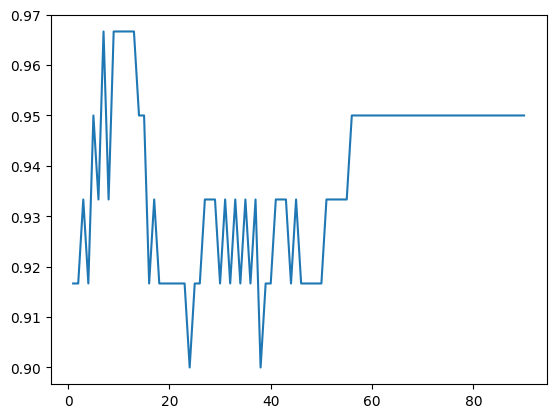

In [55]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float64) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))

print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

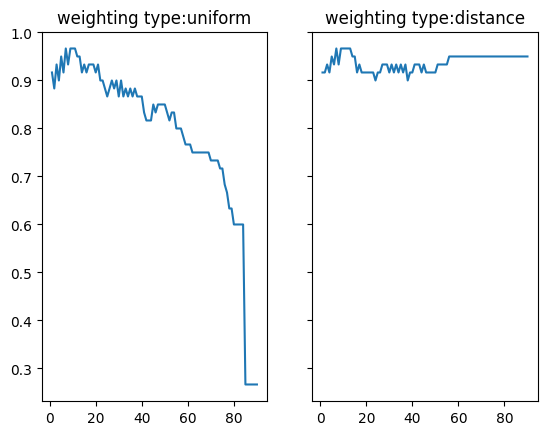

In [56]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float64) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

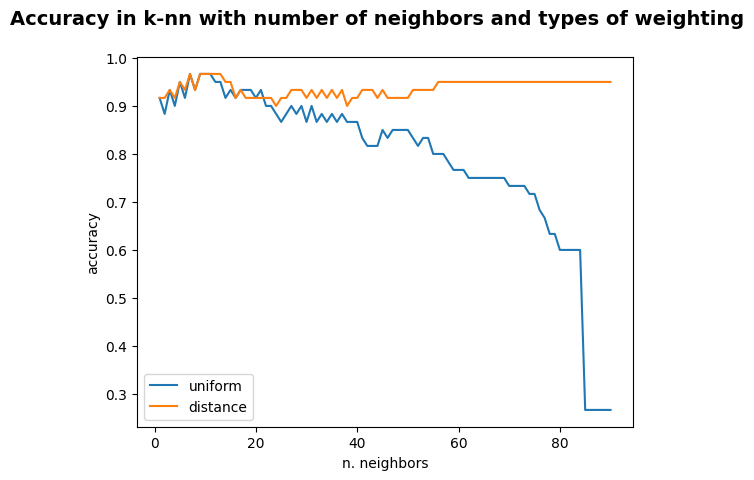

In [57]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float64) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')
plt.show()


Rappresenta graficamente il set di dati Iris in 2D, con il colore rosso per Setosa, blu per Versicolor e verde per Virginica.

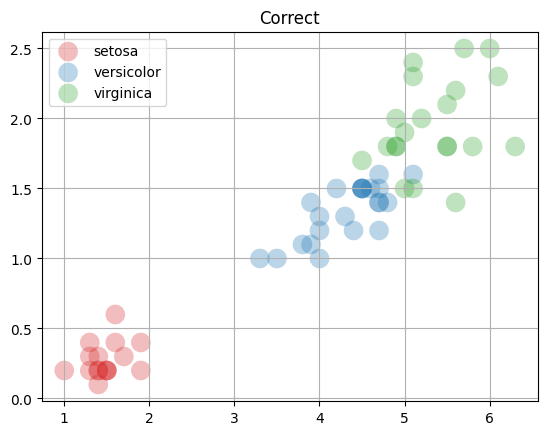

In [58]:
import matplotlib.pyplot as plt

def plot_scatter_colored(X_test, y_test, title):
    color_to_classes = {
        'tab:red': 0,
        'tab:blue': 1,
        'tab:green': 2
    }
    color_to_names = {
        'tab:red': "setosa",
        'tab:blue': "versicolor",
        'tab:green': "virginica"
    }

    fig, ax = plt.subplots()
    for color in ['tab:red', 'tab:blue', 'tab:green']:
        
        x = []
        y = []
        for (x_iris,y_iris) in zip(X_test, y_test):
            if color_to_classes[color]==y_iris:
                x.append(x_iris[2]) 
                y.append(x_iris[3]) 
                
        scale = 200.0 
        ax.scatter(x, y, c=color, s=scale, label=color_to_names[color],
                alpha=0.3, edgecolors='none')

    ax.legend()
    ax.grid(True)

    plt.title(title)
    plt.show()

plot_scatter_colored(X_test, y_test, "Correct")

## Cosa devi fare:

# Esercizio 1
Traccia il dataset Iris, in 2-D, con il colore come sopra determinato dalla stima k-nn.
Devi scegliere le 2 feature di input dalle quattro originali. Quali sono le migliori da scegliere in modo che le classi siano separate nello spazio di rappresentazione e meglio distinguibili?

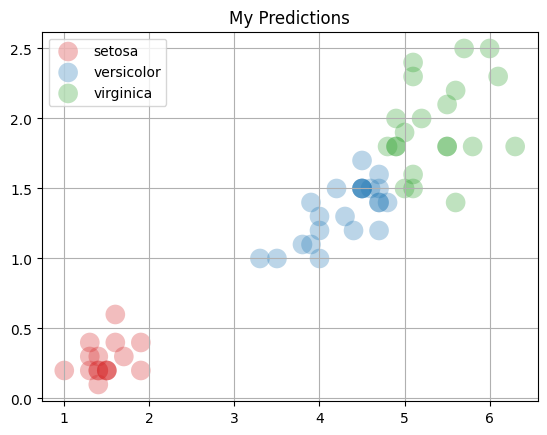

In [59]:
my_clf_knn = neighbors.KNeighborsClassifier(n_neighbors=7)

my_clf_knn.fit(X_train, y_train)
my_y_preds = my_clf_knn.predict(X_test)
plot_scatter_colored(X_test, my_y_preds, "My Predictions")


# Esercizio 2

Traccia il grafico ROC del k-nn (per il miglior valore di k) per ciascuna delle tre classi: setosa, virginica e versicolor

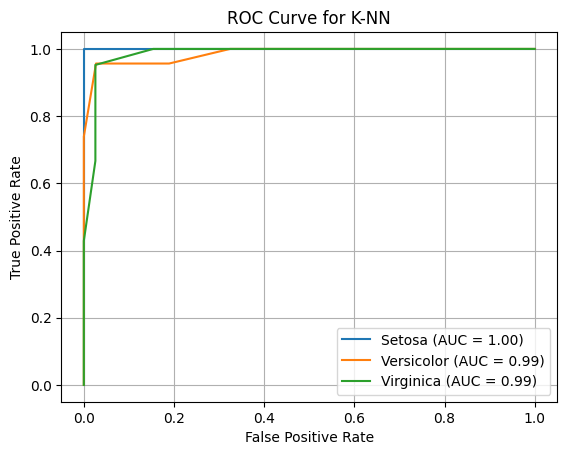

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convertiamo le etichette di test in formato binarizzato per il ROC per ciascuna classe\
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Predizioni con probabilità dal modello K-NN
y_proba_knn = my_clf_knn.predict_proba(X_test)

# Plot ROC per ogni classe
for i, class_label in enumerate(['Setosa', 'Versicolor', 'Virginica']):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_proba_knn[:, i])
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc_score(y_test_binarized[:, i], y_proba_knn[:, i]):.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-NN")
plt.legend()
plt.grid()
plt.show()


# Esercizio 3
Traccia il grafico ROC per il miglior albero decisionale che hai addestrato nell'esercizio n. 1

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Best Parameters: {'class_weight': {0: 1, 1: 10, 2: 1}, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15}
Best F1 Macro Score: 0.9532497911445279
Accuracy: 0.9


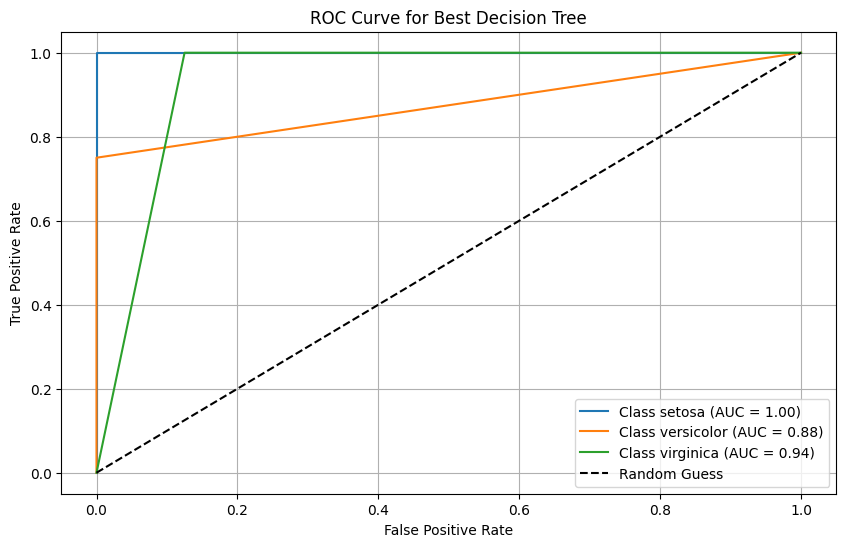

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Caricamento del dataset Iris
iris = load_iris()

# Configurazione iniziale del classificatore
clf = DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0: 1, 1: 1, 2: 1})

# Suddivisione dei dati: ultimi 10 per il test set
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
indices_training = indices[:-10]
indices_test = indices[-10:]

iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test = iris.data[indices_test]
iris_y_test = iris.target[indices_test]

# Fit del modello di base
clf = clf.fit(iris_X_train, iris_y_train)

# Configurazione del GridSearchCV
param_grid = {
    "min_samples_leaf": [5, 10, 15, 20, 25],
    "criterion": ["gini", "entropy"],
    "class_weight": [
        {0: 1, 1: 1, 2: 1},
        {0: 1, 1: 10, 2: 1},
        {0: 1, 1: 1, 2: 10},
        {0: 10, 1: 1, 2: 1},
    ],
    "max_depth": [3, 5, 10, None],
    "min_impurity_decrease": [0.0, 0.01, 0.1],
    "max_leaf_nodes": [None, 10, 20, 50],
}

searcher = GridSearchCV(
    clf,
    param_grid=param_grid,
    verbose=True,
    n_jobs=-1,
    scoring="f1_macro",
)

# Ricerca del miglior modello
searcher.fit(iris.data, iris.target)
print("Best Parameters:", searcher.best_params_)
print("Best F1 Macro Score:", searcher.best_score_)

# Creazione e addestramento del miglior modello
clf_best = DecisionTreeClassifier(
    class_weight=searcher.best_params_["class_weight"],
    criterion=searcher.best_params_["criterion"],
    min_samples_leaf=searcher.best_params_["min_samples_leaf"],
    max_depth=searcher.best_params_["max_depth"],
    min_impurity_decrease=searcher.best_params_["min_impurity_decrease"],
    max_leaf_nodes=searcher.best_params_["max_leaf_nodes"],
    random_state=300,
)

clf_best.fit(iris_X_train, iris_y_train)

# Previsione e valutazione
iris_y_pred = clf_best.predict(iris_X_test)
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print("Accuracy:", accuracy)

# Calcolo delle probabilità per le curve ROC
iris_y_test_bin = label_binarize(iris_y_test, classes=[0, 1, 2])
iris_y_pred_prob = clf_best.predict_proba(iris_X_test)

# Generazione delle curve ROC per ciascuna classe
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(iris.target_names):
    fpr, tpr, _ = roc_curve(iris_y_test_bin[:, i], iris_y_pred_prob[:, i])
    auc = roc_auc_score(iris_y_test_bin[:, i], iris_y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Personalizzazione del grafico
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Best Decision Tree")
plt.legend()
plt.grid()
plt.show()


# Esercizio 4
Confronta gli alberi decisionali e k-nn sullo spazio ROC: per quali valori di (TPR,FPR) k-nn è migliore degli alberi decisionali?

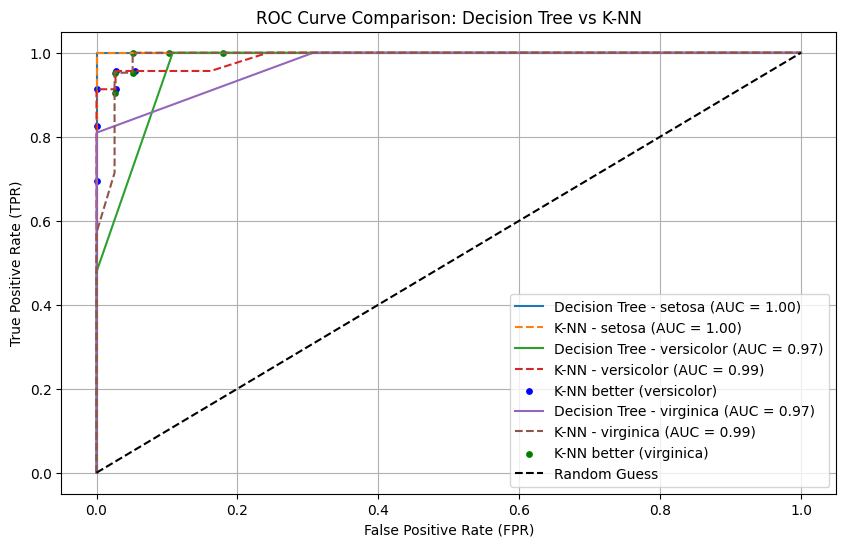

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Definizione dei colori per i "better points" di ciascuna classe
better_colors = {"setosa": "red", "versicolor": "blue", "virginica": "green"}

# Confronto tra Decision Tree e K-NN nello spazio ROC
plt.figure(figsize=(10, 6))

# Loop su ciascuna classe del dataset
for i, class_label in enumerate(iris.target_names):
    # Calcolo delle curve ROC per il Decision Tree
    prob_tree = clf_best.predict_proba(X_test)[:, i]
    fpr_tree, tpr_tree, _ = roc_curve(y_test == i, prob_tree)
    auc_tree = roc_auc_score(y_test == i, prob_tree)
    
    # Calcolo delle curve ROC per il K-NN
    prob_knn = clf_knn.predict_proba(X_test)[:, i]
    fpr_knn, tpr_knn, _ = roc_curve(y_test == i, prob_knn)
    auc_knn = roc_auc_score(y_test == i, prob_knn)

    # Tracciamento delle curve ROC
    plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree - {class_label} (AUC = {auc_tree:.2f})")
    plt.plot(fpr_knn, tpr_knn, linestyle='--', label=f"K-NN - {class_label} (AUC = {auc_knn:.2f})")
    
    # Evidenziazione dei punti in cui il K-NN è migliore
    better_knn = np.where(tpr_knn > np.interp(fpr_knn, fpr_tree, tpr_tree))[0]
    if len(better_knn) > 0:
        plt.scatter(fpr_knn[better_knn], tpr_knn[better_knn],
                    color=better_colors[class_label], s=15,
                    label=f"K-NN better ({class_label})")

# Aggiunta di linea di riferimento per Random Guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Personalizzazione del grafico
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Decision Tree vs K-NN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Esercizio 5
Di seguito, estendi l'esercizio precedente su k-nn utilizzando una funzione kernel K(x,y) per il calcolo delle distanze, in modo che distance(x,y)=1-K(x,y). Utilizza un kernel di tipo gaussiano (o funzione di base radiale) K(x,y)=exp(-gamma(x-y)^2), con gamma l'inverso della varianza sigma al quadrato, che deve essere regolato sul valore migliore in base all'accuratezza raggiunta da k-nn, con k=7 (similmente a quanto fatto con l'esempio precedente sulla regolazione del parametro n_neightbors).

###################

Eseguite k-nn ma ora usate come funzione di distanza una funzione:

distance(x,y)= 1- k(x,y) 

dove k(x,y) e` un Kernel Gaussian-like  k(x,y) (per k(x,y) usate la Radial Basis Function con il parametro Gamma  = 1/sigma^2)

γ = 1/sigma^2

che controlla la sua ampiezza.

Il parametro gamma deve essere aggiustato al valore ottimale, a secondo dell'accuratezza del k-nn (in modo simile a quanto abbiamo fatto precedentemente per il parametro n_neighbors). In questo caso, scegliete un valore di k=7.


L'obiettivo è trovare il valore ottimale del parametro gamma, che influenza la forma del kernel e quindi la distanza calcolata, massimizzando l'accuratezza del modello, quindi ottimizzare il valore di γ per ottenere il miglior compromesso tra generalizzazione e adattamento ai dati.

Miglior gamma: 0.00000010, Accuratezza migliore: 0.96666667, F1 score migliore: 0.96963423


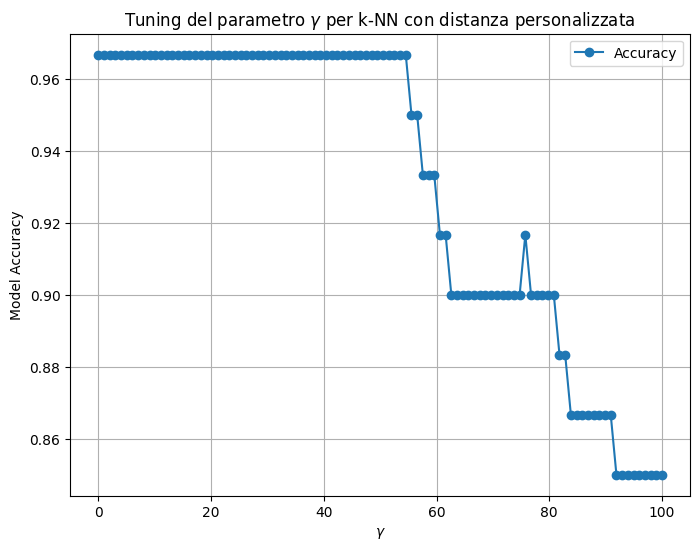

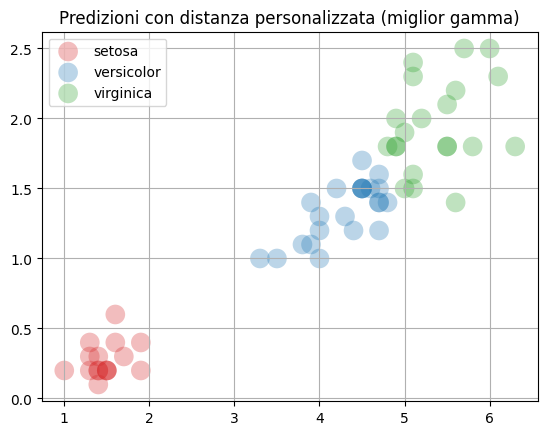

In [101]:
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt


# Funzione kernel gaussiano
def create_custom_distance(gamma):
    """
    Ritorna una funzione di distanza personalizzata basata su gamma.
    """
    def custom_distance(x, y):
        return 1 - np.exp(-gamma * np.linalg.norm(x - y)**2)
    return custom_distance

# Parametri per il tuning
N = 100  # Numero di valori di gamma da testare
gamma_values = np.linspace(0.0000001, 100.0, N)  
best_gamma = None
best_accuracy = 0
accuracies = []

# Tuning del parametro gamma
for gamma in gamma_values:
    # Creazione della funzione di distanza personalizzata
    custom_distance = create_custom_distance(gamma)
    #print("gamma="+str(gamma))

    # Creazione del modello k-NN con distanza personalizzata
    knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric=custom_distance)
    knn.fit(X_train, y_train)

    # Valutazione del modello
    y_preds = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    f1_ris = f1_score(y_test, y_preds, average="macro")
    accuracies.append(accuracy)

    # Aggiorna il miglior gamma
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_gamma = gamma
    if f1_ris>best_f1score:
        best_f1score=f1_ris

# Risultati del tuning
print(f"Miglior gamma: {best_gamma:.8f}, Accuratezza migliore: {best_accuracy:.8f}, F1 score migliore: {best_f1score:.8f}")

# Plot dei risultati
plt.figure(figsize=(8, 6))
plt.plot(gamma_values, accuracies, marker='o', label="Accuracy")
plt.xlabel(r"$\gamma$")
plt.ylabel("Model Accuracy")
plt.title(r"Tuning del parametro $\gamma$ per k-NN con distanza personalizzata")
plt.legend()
plt.grid()
plt.show()

# Modello finale con il miglior gamma
custom_distance = create_custom_distance(best_gamma)
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric=custom_distance)
knn.fit(X_train, y_train)
final_preds = knn.predict(X_test)

# Visualizzazione dei risultati finali (sostituire con una funzione reale per la visualizzazione)
plot_scatter_colored(X_test, final_preds, "Predizioni con distanza personalizzata (miglior gamma)")


Il valore di γ che massimizza l'accuratezza si trova nella parte piatta iniziale del grafico (dove l'accuratezza è più alta e costante). 

Il miglior γ  cioè 0.00000010 

miglior compromesso tra sensibilità ai dettagli e generalizzazione del modello.


Con un γ grande (σ piccolo), il kernel gaussiano diventa molto stretto.
Questo significa che solo i punti molto vicini contribuiscono significativamente al calcolo della distanza (la distanza aumenta rapidamente anche per piccoli spostamenti tra i punti).

Gamma alto → Modello troppo specializzato (overfitting).
Gamma basso → Modello troppo generico (underfitting).